In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
def draw_styled_landmarks(image, results):
    # # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
import cv2

cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

r, frame = cam.read()
...
print('Resolution: ' + str(frame.shape[0]) + ' x ' + str(frame.shape[1]))

In [5]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 960)

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        # draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('toha', image)
        print('Resolution: ' + str(frame.shape[0]) + ' x ' + str(frame.shape[1]))

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Resolution: 768 x 1024
<class 'mediapipe.python.solution_base.S

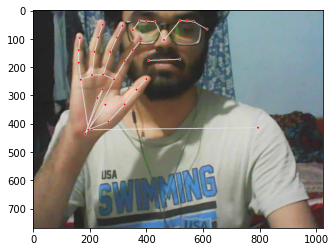

In [6]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
len(results.right_hand_landmarks.landmark)

21

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])
result_test = extract_keypoints(results)


In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('M:\Handsign\ActionDetectionforSignLanguage-main\V_word\signdata')

# Actions that we try to detect
# actions = np.array(['তুমি','সুন্দর','নাম','আমরা'])
# actions = np.array(['Nygv‡bv','gv','evev','e›`yK','`vI','e¨vqvg','Mvwo','dzj','bv','Avgiv','eÜy','Zzwg','K¨v‡giv','wegvb','hy×','‡Uwj‡dvb','mg_©b','bvgvh','fvj','my›`i','bvg'])
# actions = np.array(['ুঘমােনা','মা','বাবা','বনু্দক','দাও','েবয়াম','গািড়','ুফল','না','আমরা','বনু্ধ','তুিম','েকেমরা','িবমান','ুযদ্ধ','েটিলেফান','সমর্থন','নামায','ভাল','ুসন্দর','নাম'])
actions = np.array(['ঘুমানো','মা','বাবা','বন্দুক','দাও','ব্যায়াম','গাড়ি','ফুল','না','আমরা','বন্ধু','তুমি','ক্যামেরা','বিমান','যুদ্ধ','টেলিফোন','সমর্থন','নামায','ভাল','সুন্দর','নাম'])
# action1 = np.array(['Sleep','mother','father','gun','give','exercise','car','flower','never','we','friend','you','camera','aeroplane','war','telephone','support','prayer','well','nice','name'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [ ]:
for action in actions: 
    # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Data Collection

In [ ]:
cap = cv2.VideoCapture(0)
from PIL import ImageFont, ImageDraw, Image
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1,no_sequences+1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)
                cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 960)    
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [15]:
from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
label_map = {label:num for num, label in enumerate(actions)}
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

np.array(labels).shape

(630,)

In [16]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.085)
y_test.shape
X.shape
label_map

{'ঘুমানো': 0,
 'মা': 1,
 'বাবা': 2,
 'বন্দুক': 3,
 'দাও': 4,
 'ব্যায়াম': 5,
 'গাড়ি': 6,
 'ফুল': 7,
 'না': 8,
 'আমরা': 9,
 'বন্ধু': 10,
 'তুমি': 11,
 'ক্যামেরা': 12,
 'বিমান': 13,
 'যুদ্ধ': 14,
 'টেলিফোন': 15,
 'সমর্থন': 16,
 'নামায': 17,
 'ভাল': 18,
 'সুন্দর': 19,
 'নাম': 20}

In [17]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [22]:
con_mat = tf.math.confusion_matrix(labels=ytrue, predictions=yhat).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = action1, columns = action1)


<AxesSubplot:>

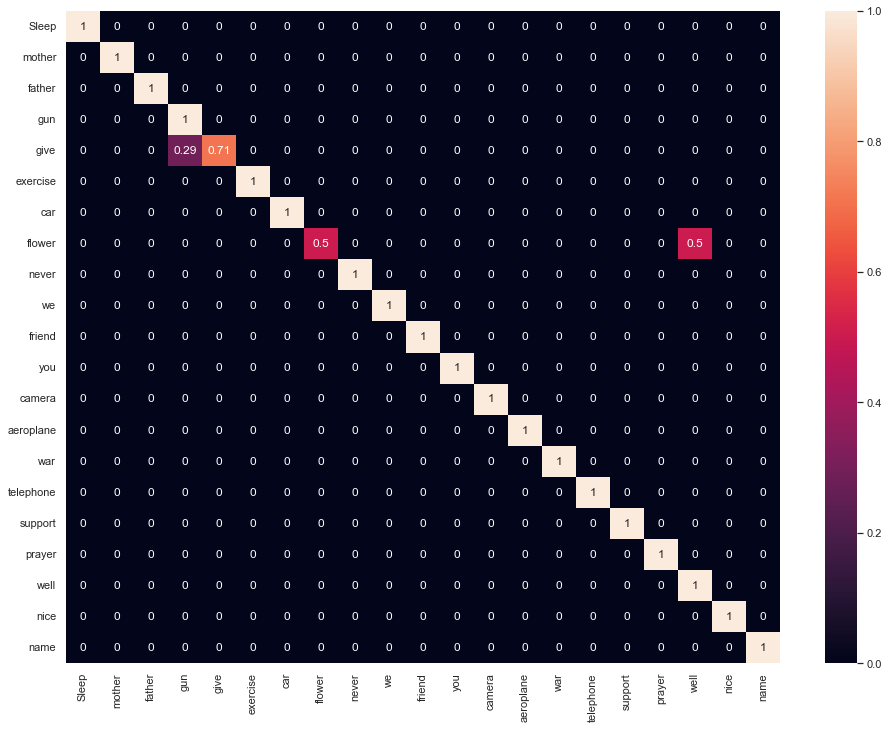

In [25]:
# matrix_confusion = multilabel_confusion_matrix(ytrue, yhat)
# df = matrix_confusion.transpose(2,0,1).reshape(8,-1)
# sns.heatmap(df, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(con_mat_df, annot=True)

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Flatten
from keras.callbacks import TensorBoard
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy','AUC'])

In [20]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=500, callbacks=[tb_callback])

Epoch 1/500
18/18 [==============================] - 5s 106ms/step - loss: 3.0172 - accuracy: 0.0920 - auc: 0.5924 - val_loss: 3.0183 - val_accuracy: 0.0926 - val_auc: 0.5438
Epoch 2/500
18/18 [==============================] - 0s 23ms/step - loss: 2.9949 - accuracy: 0.1215 - auc: 0.6413 - val_loss: 2.9988 - val_accuracy: 0.0926 - val_auc: 0.6038
Epoch 3/500
18/18 [==============================] - 1s 30ms/step - loss: 2.9703 - accuracy: 0.1337 - auc: 0.6883 - val_loss: 2.9765 - val_accuracy: 0.1296 - val_auc: 0.6787
Epoch 4/500
18/18 [==============================] - 0s 24ms/step - loss: 2.9410 - accuracy: 0.1337 - auc: 0.7279 - val_loss: 2.9508 - val_accuracy: 0.1111 - val_auc: 0.7242
Epoch 5/500
18/18 [==============================] - 0s 28ms/step - loss: 2.9064 - accuracy: 0.1441 - auc: 0.7553 - val_loss: 2.9199 - val_accuracy: 0.1111 - val_auc: 0.7127
Epoch 6/500
18/18 [==============================] - 1s 28ms/step - loss: 2.8659 - accuracy: 0.1632 - auc: 0.7600 - val_loss: 2.8

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [ ]:
model.save('draft3.h5')

In [12]:
model.load_weights('M:\Handsign\ActionDetectionforSignLanguage-main\V_word\draft3.h5')

OSError: Unable to open file (file signature not found)

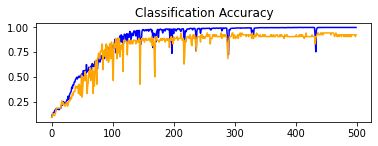

In [22]:
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [21]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import tensorflow as tf
from tensorflow import keras
# model = keras.models.load_model('M:\Handsign\ActionDetectionforSignLanguage-main\V_word\draft2.h5')
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.87

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        img, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
#         draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        # cv2.rectangle(image, (0,0),(640, 25), (640, 420), -1)
        # cv2.putText(image, ' '.join(sentence), (3,440), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 255, 255), 2, cv2.LINE_AA)
        font = ImageFont.truetype("C:\WINDOWS\FONTS\Siyam Rupali ANSI.ttf", 32)
        img_pil = Image.fromarray(img)
        draw = ImageDraw.Draw(img_pil)
        draw.text((3, 400),  ' '.join(sentence), font = font, fill = (20, 255, 255, 0))
        img = np.array(img_pil)
        
        # Show to screen
        # cv2.resizeWindow("OpenCV Feed", 400, 300)
        cv2.imshow('OpenCV Feed', img)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti